In [24]:
import pandas
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
import numpy as np

{'layers': [{'type': 'input', 'neurons': 4}, {'type': 'hidden', 'neurons': 4, 'activation': 'sigmoid'}, {'type': 'output', 'neurons': 1, 'activation': 'sigmoid'}], 'learning_rate': 0.1, 'epochs': 2, 'batch_size': 32}
Epoch 1/2
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7621 - loss: 0.5573 - val_accuracy: 0.7539 - val_loss: 0.5582
Epoch 2/2
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7611 - loss: 0.5498 - val_accuracy: 0.7539 - val_loss: 0.5583


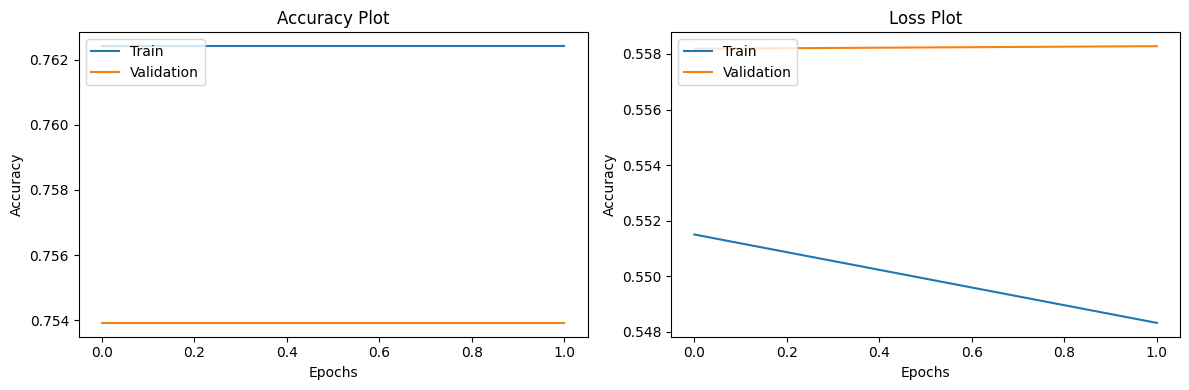

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 4)                   │             436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,325 (5.18 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 884 (3.46 KB)

In [27]:
data = pandas.read_csv('dataset/adult.csv')
data.dropna()
data.drop_duplicates()
data.drop("fnlwgt", axis = 1)

X = pandas.get_dummies(data.drop('income', axis = 1))
y = data['income']

le = LabelEncoder()
y = le.fit_transform(y)

with open('MLP.json') as f:
    config = json.load(f)

print(config)
layers_list = []
for layer in config['layers']:
    if layer['type'] == 'input':
        layers_list.append(Input((X.shape[1],)))
    else:
        layers_list.append(Dense(layer['neurons'], activation = layer['activation']))

model = Sequential(layers_list)
        
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

x_tensor = tf.convert_to_tensor(X, dtype = tf.float32)
y_tensor = tf.convert_to_tensor(y, dtype = tf.float32)

history = model.fit(x_tensor, y_tensor, batch_size =config['batch_size'], validation_split = 0.2, epochs = config['epochs'])

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = "upper left")

plt.subplot(1, 2, 2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = "upper left")

plt.tight_layout()
plt.show()

model.summary()


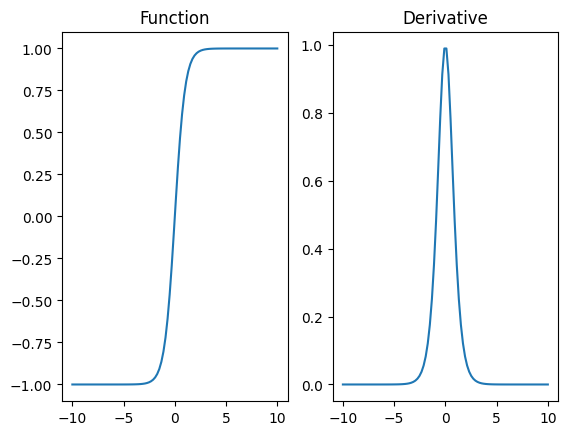

In [26]:
x_values = np.linspace(-10, 10, 100)


def tanh(x):
    return ((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
def tanh_derivative(x):
    return (1 - tanh(x)**2)

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Function")
y_values = tanh(x_values)
plt.plot(x_values, y_values)

plt.subplot(1, 2, 2)
plt.title("Derivative")
y_values = tanh_derivative(x_values)
plt.plot(x_values, y_values)

